In [54]:
from datetime import datetime
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl


import pyglow
from pyglow import Point
from pyglow import IRI
from pyglow import LocationTime



In [55]:
lat = 65.12
lon = -147.43

alt = np.linspace(90,150,10)

density = []
temp = []
time = []

for i in np.arange(1,32,1):
    
    dn = datetime(2018,3,i,19,30)
    
    den_temp = []
    temp_t = []
    
    for j in range(np.size(alt)):
        
        pt = pyglow.Point(dn,lat,lon,alt[j])
        pt.run_msis()
        den_temp.append(pt.rho) #g/cm^3
        temp_t.append(pt.Tn_msis) 
        
    density.append(den_temp)
    temp.append(temp_t)
    time.append(dn)

print(density)
print(temp)
print(time)



    

[[2.7668374e-09, 9.361772e-10, 2.87375e-10, 8.7390296e-11, 2.9732144e-11, 1.2206944e-11, 6.302554e-12, 3.6959507e-12, 2.3509515e-12, 1.5798646e-12], [2.7711333e-09, 9.424207e-10, 2.9350763e-10, 8.994756e-11, 3.0240904e-11, 1.2232643e-11, 6.288452e-12, 3.677868e-12, 2.3345284e-12, 1.5655466e-12], [2.7912217e-09, 9.460014e-10, 2.9152775e-10, 8.8817745e-11, 3.011629e-11, 1.23041915e-11, 6.335908e-12, 3.7091203e-12, 2.3562612e-12, 1.5816384e-12], [2.8106315e-09, 9.49351e-10, 2.896459e-10, 8.775073e-11, 2.999879e-11, 1.2373031e-11, 6.3820112e-12, 3.7395625e-12, 2.3772711e-12, 1.596921e-12], [2.817253e-09, 9.561082e-10, 2.9594943e-10, 9.037395e-11, 3.0527112e-11, 1.2406545e-11, 6.3699757e-12, 3.722062e-12, 2.361425e-12, 1.5836364e-12], [2.830959e-09, 9.59796e-10, 2.9643094e-10, 9.042002e-11, 3.060014e-11, 1.2454361e-11, 6.393217e-12, 3.7348484e-12, 2.3688052e-12, 1.5878604e-12], [2.8417266e-09, 9.65337e-10, 3.0024402e-10, 9.194153e-11, 3.0934352e-11, 1.2498075e-11, 6.398101e-12, 3.7313633e-1

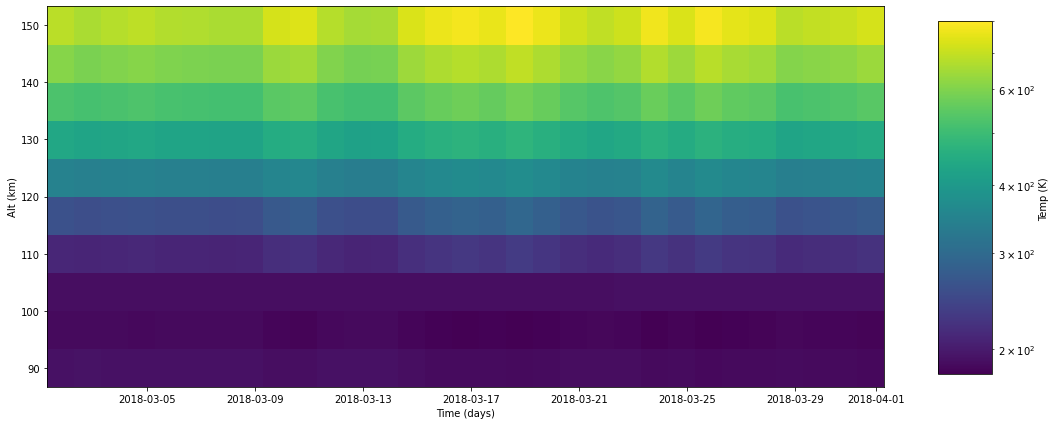

In [57]:
x,y = np.meshgrid(time,alt)

den2 = np.transpose(density)
temp2 = np.transpose(temp)

z_min, z_max = 180, 800
normt = mpl.colors.LogNorm(vmin=z_min, vmax=z_max)

q, ax = plt.subplots(1,figsize=[15,7],facecolor='w',edgecolor='k')

ax.set_ylabel('Alt (km)',fontsize=10)
ax.set_xlabel('Time (days)')

imNe = plt.pcolormesh(x,y,temp2,shading='auto')

newaxisTemp = [.95,.15,.05,.70]
colorbar = q.add_axes(newaxisTemp)
nat = mpl.colorbar.ColorbarBase(colorbar,orientation='vertical',norm=normt)
nat.set_label('Temp (K)',fontsize=10)

plt.savefig('2018-3_MSIS.png',dpi=300, bbox_inches='tight', pad_inches=0.5)

In [ ]:
lat2 = 65.12  # Poker
lon2 = -147.43

alt2 = 125.
dn = datetime(2012,3,5,5,5)

location_time = LocationTime(dn,lat2,lon2,alt2)

iri = IRI()
iri.run(location_time)


print(iri.Te)

In [ ]:
def getUTCtime(untime):
    UTCTime = []
    for time_i in range(np.size(untime)):
        UTCTime.append(datetime.utcfromtimestamp(untime[time_i]))
    UTCTime = np.array(UTCTime)

    return UTCTime

In [ ]:
lat2 = 65.12  # Poker
lon2 = -147.43

time2 = [1351747500,1351747910,1351755940,1351737000]
alt2 = [83005.33621288,87502.22087675,91999.11062692,106495.99529082]



utc2 = getUTCtime(time2)

ned = []

iri = pyglow.IRI()


for i in range(np.size(utc2)):
    
    aux_ne = []
    
    for j in range(np.size(alt2)):
        
        pt2 = pyglow.Point(utc2[i],lat2,lon2,alt2[j])
        #pt2 = pyglow.LocationTime(utc2[i],lat2,lon2,alt2[j])
        pt2.run_iri()
        aux_ne.append(pt2.ne)
        print(aux_ne)
    ned.append(aux_ne)

print(ned)
